In [3]:
!pip install lenskit

import lenskit.datasets as ds
import pandas as pd



data = ds.MovieLens('data/')


In [27]:
!git clone https://github.com/DudJuz/Movie-recommendation-system.git
data.ratings.head(10)

fatal: destination path 'Movie-recommendation-system' already exists and is not an empty directory.


,user,item,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [4]:
import datetime
#data.ratings.timestamp = datetime.datetime.fromtimestamp(data.ratings.timestamp).intftime('%Y-%m-%d %H:%M:%S')
data.ratings.timestamp = pd.to_datetime(data.ratings.timestamp,unit = 's')
print(data.ratings.timestamp)

0        2000-07-30 18:45:03
1        2000-07-30 18:20:47
2        2000-07-30 18:37:04
3        2000-07-30 19:03:35
4        2000-07-30 18:48:51
                 ...        
100831   2017-05-03 21:53:22
100832   2017-05-03 22:21:31
100833   2017-05-08 19:50:47
100834   2017-05-03 21:19:12
100835   2017-05-03 21:20:15
Name: timestamp, Length: 100836, dtype: datetime64[ns]


### Summary statistics and distribution.

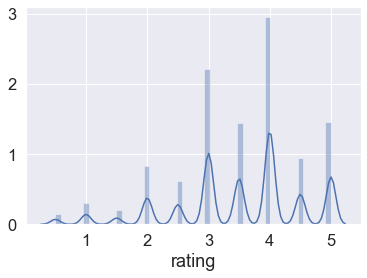

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
#combine the cvs files 
joined_data = data.ratings.join(data.movies['genres'],on ='item')
joined_data =joined_data.join(data.movies['title'],on ='item')
copy_data = data.ratings
joined_data.head(10)
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(copy_data['rating'].fillna(copy_data['rating'].median()))

In [7]:
joined_data.head(10)

,user,item,rating,timestamp,genres,title
0,1,1,4.0,2000-07-30 18:45:03,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,1,3,4.0,2000-07-30 18:20:47,Comedy|Romance,Grumpier Old Men (1995)
2,1,6,4.0,2000-07-30 18:37:04,Action|Crime|Thriller,Heat (1995)
3,1,47,5.0,2000-07-30 19:03:35,Mystery|Thriller,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,2000-07-30 18:48:51,Crime|Mystery|Thriller,"Usual Suspects, The (1995)"
5,1,70,3.0,2000-07-30 18:40:00,Action|Comedy|Horror|Thriller,From Dusk Till Dawn (1996)
6,1,101,5.0,2000-07-30 18:14:28,Adventure|Comedy|Crime|Romance,Bottle Rocket (1996)
7,1,110,4.0,2000-07-30 18:36:16,Action|Drama|War,Braveheart (1995)
8,1,151,5.0,2000-07-30 19:07:21,Action|Drama|Romance|War,Rob Roy (1995)
9,1,157,5.0,2000-07-30 19:08:20,Comedy|War,Canadian Bacon (1995)


### Average all the ratings by item
* Sorting the movie which the condition of minimum reviews of 30
people

In [30]:

#<-- You can try changing this minimum to include movies rated by fewer or more people
minimum_to_include = 30 
average_ratings = round((data.ratings).groupby(['item']).mean(),3)

rating_counts = (data.ratings).groupby(['item']).count()
average_ratings = average_ratings.loc[rating_counts['rating'] > minimum_to_include]
sorted_avg_ratings = average_ratings.sort_values(by="rating", ascending=False)
joined_data = sorted_avg_ratings.join(data.movies['genres'], on='item')
joined_data = joined_data.join(data.movies['title'], on='item')
joined_data = joined_data[joined_data.columns[0:]]

print("RECOMMENDED FOR ANYBODY:")
joined_data.head(10)

RECOMMENDED FOR ANYBODY:


,user,rating,genres,title
item,,,,
318,302.300,4.429,Crime|Drama,"Shawshank Redemption, The (1994)"
1204,316.933,4.300,Adventure|Drama|War,Lawrence of Arabia (1962)
858,297.745,4.289,Crime|Drama,"Godfather, The (1972)"
2959,319.894,4.273,Action|Crime|Drama|Thriller,Fight Club (1999)
1276,273.211,4.272,Drama,Cool Hand Luke (1967)
750,316.825,4.268,Comedy|War,Dr. Strangelove or: How I Learned to Stop Worr...
904,309.929,4.262,Mystery|Thriller,Rear Window (1954)
1221,307.581,4.260,Crime|Drama,"Godfather: Part II, The (1974)"
48516,319.168,4.252,Crime|Drama|Thriller,"Departed, The (2006)"


## Narrowing the list down by favorite 
### Action Movies   

In [31]:

average_ratings = (data.ratings).groupby(['item']).mean()
rating_counts = (data.ratings).groupby(['item']).count()

#print("rating count",rating_counts)
average_ratings = average_ratings.loc[rating_counts['rating'] > minimum_to_include]
average_ratings = average_ratings.join(data.movies['genres'], on='item')
average_ratings = average_ratings.loc[average_ratings['genres'].str.contains('Action')]


sorted_avg_ratings = average_ratings.sort_values(by="rating", ascending=False)
joined_data = sorted_avg_ratings.join(data.movies['title'], on='item')
joined_data = joined_data[joined_data.columns[3:]]
print("RECOMMENDED FOR AN ACTION MOVIE FAN:")
joined_data.head(10)

RECOMMENDED FOR AN ACTION MOVIE FAN:


,title
item,
2959,Fight Club (1999)
58559,"Dark Knight, The (2008)"
1197,"Princess Bride, The (1987)"
260,Star Wars: Episode IV - A New Hope (1977)
3275,"Boondock Saints, The (2000)"
1208,Apocalypse Now (1979)
1196,Star Wars: Episode V - The Empire Strikes Back...
1233,"Boot, Das (Boat, The) (1981)"
1198,Raiders of the Lost Ark (Indiana Jones and the...


### Romance Movies

In [169]:
average_ratings = (data.ratings).groupby(['item']).mean()
rating_counts = (data.ratings).groupby(['item']).count()

#print("rating count",rating_counts)
average_ratings = average_ratings.loc[rating_counts['rating'] > minimum_to_include]
average_ratings = average_ratings.join(data.movies['genres'], on='item')
average_ratings = average_ratings.loc[average_ratings['genres'].str.contains('Romance')]


sorted_avg_ratings = average_ratings.sort_values(by="rating", ascending=False)
joined_data = sorted_avg_ratings.join(data.movies['title'], on='item')
joined_data = joined_data[joined_data.columns[3:]]
print("RECOMMENDED FOR AN ACTION MOVIE FAN:")
joined_data.head(10)

RECOMMENDED FOR AN ACTION MOVIE FAN:


,title
item,
912,Casablanca (1942)
1197,"Princess Bride, The (1987)"
908,North by Northwest (1959)
4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ..."
356,Forrest Gump (1994)
7361,Eternal Sunshine of the Spotless Mind (2004)
2324,Life Is Beautiful (La Vita è bella) (1997)
44555,"Lives of Others, The (Das leben der Anderen) (..."
1244,Manhattan (1979)


### Importing our personalized ratings

In [10]:
import csv

Baemin_rating_dict = {}
Dennis_rating_dict = {}
Tan_rating_dict = {}
#Dennis's
with open("Dennis-movie-ratings.csv", newline='') as csvfile:
  ratings_reader = csv.DictReader(csvfile)
  for row in ratings_reader:
    if ((row['ratings'] != "") and (float(row['ratings']) > 0) and (float(row['ratings']) < 6)):
      Dennis_rating_dict.update({int(row['item']): float(row['ratings'])})
#Baemin's
with open("Baemin-movie-ratings.csv", newline='') as csvfile:
  ratings_reader = csv.DictReader(csvfile)
  for row in ratings_reader:
    if ((row['ratings'] != "") and (float(row['ratings']) > 0) and (float(row['ratings']) < 6)):
      Baemin_rating_dict.update({int(row['item']): float(row['ratings'])})
#Chris's
with open("Tan-movie-ratings.csv", newline='') as csvfile:
  ratings_reader = csv.DictReader(csvfile)
  for row in ratings_reader:
    if ((row['ratings'] != "") and (float(row['ratings']) > 0) and (float(row['ratings']) < 6)):
      Tan_rating_dict.update({int(row['item']): float(row['ratings'])})

print("Rating dictionaries assembled!")



Rating dictionaries assembled!


### Train a new collaborative filtering model to provide recommendations

In [33]:
from lenskit.algorithms import Recommender
from lenskit.algorithms.user_knn import UserUser

num_recs = 6  #<---- This is the number of recommendations to generate. You can change this if you want to see more recommendations

user_user = UserUser(15, min_nbrs = 3) #These two numbers set the minimum (3) and maximum (15) number of neighbors to consider. These are considered "reasonable defaults," but you can experiment with others too
algo = Recommender.adapt(user_user)
algo.fit(data.ratings)

print("Set up a User-User algorithm!")

Set up a User-User algorithm!


### Recommendated movies for Dennis


In [34]:
Dennis_recs = algo.recommend(-1, num_recs, ratings=pd.Series(Dennis_rating_dict))  #Here, -1 tells it that it's not an existing user in the set, that we're giving new ratings, while 10 is how many recommendations it should generate

joined_data = Dennis_recs.join(data.movies['genres'], on='item')      
joined_data = joined_data.join(data.movies['title'], on='item')
joined_data = joined_data[joined_data.columns[2:]]
print("\n\nRECOMMENDED FOR Dennis:")
joined_data



RECOMMENDED FOR Dennis:


,genres,title
0,Comedy|Drama,"Last Detail, The (1973)"
1,Comedy,Love and Death (1975)
2,Drama,Before Night Falls (2000)
3,Drama,"Magdalene Sisters, The (2002)"
4,Drama|Horror|Mystery|Sci-Fi|Thriller,Black Mirror: White Christmas (2014)
5,Action|Animation|Drama|Fantasy|Sci-Fi,Neon Genesis Evangelion: The End of Evangelion...


### Recommendated movies for Baemin

In [35]:
Baemin_recs = algo.recommend(-1, num_recs, ratings=pd.Series(Baemin_rating_dict))  #Here, -1 tells it that it's not an existing user in the set, that we're giving new ratings, while 10 is how many recommendations it should generate

joined_data = Baemin_recs.join(data.movies['genres'], on='item')      
joined_data = joined_data.join(data.movies['title'], on='item')
joined_data = joined_data[joined_data.columns[2:]]
print("\n\nRECOMMENDED FOR Baemin:")
joined_data



RECOMMENDED FOR Baemin:


,genres,title
0,Comedy|Drama,"Last Detail, The (1973)"
1,Comedy|Drama,"Best Exotic Marigold Hotel, The (2011)"
2,Comedy,Love and Death (1975)
3,Drama,Reign Over Me (2007)
4,Drama,Half Nelson (2006)
5,Drama|Romance|Sci-Fi,Never Let Me Go (2010)


### Recommendated movies for Chris

In [36]:
Tan_recs = algo.recommend(-1, num_recs, ratings=pd.Series(Tan_rating_dict))  #Here, -1 tells it that it's not an existing user in the set, that we're giving new ratings, while 10 is how many recommendations it should generate

joined_data = Tan_recs.join(data.movies['genres'], on='item')      
joined_data = joined_data.join(data.movies['title'], on='item')
joined_data = joined_data[joined_data.columns[2:]]
print("\n\nRECOMMENDED FOR Chris:")
joined_data



RECOMMENDED FOR Chris:


,genres,title
0,Drama,Before Night Falls (2000)
1,Action|Animation|Drama|Fantasy|Sci-Fi,Neon Genesis Evangelion: The End of Evangelion...
2,Action|Adventure|Thriller,Raiders of the Lost Ark: The Adaptation (1989)
3,Documentary,Scratch (2001)
4,Comedy|Drama,"Last Detail, The (1973)"
5,Comedy|Drama|War,Underground (1995)



## Making a combined movie recommendation list for entire team
* If all of us have rated a movie, it will average our ratings
* If only one of us has rated a movie, it will just add that movie to the list of preferences

In [9]:
combined_rating_dict = {}

for k in Dennis_rating_dict:
  if k in Baemin_rating_dict and k in Tan_rating_dict:
    combined_rating_dict.update({k: float((Dennis_rating_dict[k]+Baemin_rating_dict[k] + Tan_rating_dict[k])/3)})
  else:
    combined_rating_dict.update({k:Dennis_rating_dict[k]})
for k in Baemin_rating_dict:
   if k not in combined_rating_dict:
      combined_rating_dict.update({k:Baemin_rating_dict[k]})
for k in Tan_rating_dict:
   if k not in combined_rating_dict:
      combined_rating_dict.update({k:Tan_rating_dict[k]})

      
print("Combined ratings dictionary assembled!")


Combined ratings dictionary assembled!


* So now, we have a combined dictionary that we can plug right into our User-User model to output a ranked list of new movies

In [87]:
combined_recs = algo.recommend(-1, num_recs, ratings=pd.Series(combined_rating_dict))  #Here, -1 tells it that it's not an existing user in the set, that we're giving new ratings, while 10 is how many recommendations it should generate

joined_data = combined_recs.join(data.movies['genres'], on='item')      
joined_data = joined_data.join(data.movies['title'], on='item')

joined_data = joined_data[joined_data.columns[2:]]
print("\n\nRECOMMENDED FOR OUR TEAM:")

joined_data



RECOMMENDED FOR OUR TEAM:


,genres,title
0,Comedy|Drama|Romance,Submarine (2010)
1,Comedy,Love and Death (1975)
2,Comedy|Drama,"Last Detail, The (1973)"
3,Action|Animation|Drama|Fantasy|Sci-Fi,Neon Genesis Evangelion: The End of Evangelion...
4,Adventure|Drama,Doctor Who: The Time of the Doctor (2013)
5,Crime|Drama,Pierrot le fou (1965)


### User_item CF

In [93]:
copy_data

,user,item,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51
...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12


In [81]:
copy_data['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [15]:
# Randomly sample 1% of the ratings dataset
small_data = copy_data[copy_data.columns[0:3]].sample(frac = 0.02)
# Check the sample info
print(small_data)
print(small_data.info())

       user    item  rating
61890   410    1172     4.0
72857   469    3210     3.0
75848   477    6707     2.0
56428   373     364     5.0
74203   474    4034     4.5
...     ...     ...     ...
59056   385     593     3.0
13952    89  128089     4.5
72939   470     110     5.0
79780   496    8640     2.0
58260   381    2701     2.0

[2017 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 61890 to 58260
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   user    2017 non-null   int32  
 1   item    2017 non-null   int32  
 2   rating  2017 non-null   float64
dtypes: float64(1), int32(2)
memory usage: 47.3 KB
None


In [16]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(small_data, test_size=0.2)

In [17]:
# Create two user-item matrices, one for training and another for testing
train_data_matrix = train_data[['user', 'item', 'rating']].to_numpy() 
test_data_matrix = test_data[['user', 'item', 'rating']].to_numpy() 

# Check their shape
print(train_data_matrix.shape)
print(test_data_matrix.shape)

(1613, 3)
(404, 3)


In [19]:
from sklearn.metrics.pairwise import pairwise_distances
# User Similarity Matrix
user_correlation = 1 - pairwise_distances(train_data, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[:4, :4])

[[1.         0.99997096 0.99999549 0.09419911]
 [0.99997096 1.         0.99998935 0.08660954]
 [0.99999549 0.99998935 1.         0.09120719]
 [0.09419911 0.08660954 0.09120719 1.        ]]


In [20]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation[:4, :4])

[[ 1.         -0.01874702 -0.05306148]
 [-0.01874702  1.         -0.00185193]
 [-0.05306148 -0.00185193  1.        ]]


In [21]:
# Function to predict ratings
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [25]:
# Predict ratings on the training data with both similarity score
user_prediction = predict(train_data_matrix, user_correlation, type='user')
item_prediction = predict(train_data_matrix, item_correlation, type='item')

# RMSE on the test data
#print(user_prediction)
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 23109.288106551114
Item-based CF RMSE: 28567.959886751567


In [26]:
# RMSE on the train data
print('User-based CF RMSE: ' + str(rmse(user_prediction, train_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data_matrix)))

User-based CF RMSE: 17276.159304115183
Item-based CF RMSE: 656.4057881512385
